In [27]:
#!pip install folium

In [1]:
import numpy as np
import pandas as pd
import folium
import ipywidgets as widgets
import matplotlib.pyplot as plt
from folium import plugins

In [2]:
df = pd.read_csv('SF_crimes.csv')

In [3]:
df.shape

(150500, 13)

In [4]:
df.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [5]:
limit_case =widgets.IntSlider(
    value=1000, min=1, max=5000, step=100, description='Max Cases'
)

In [6]:
def update_df_length(limit):
    limit=limit_case
    df=pd.read_csv('SF_crimes.csv')
    df=df.iloc[0:limit,:]
    print('Num Rows Loader:'+str(len(df)))

In [7]:
widgets.interactive((update_df_length, limit=limit_case))

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (1871544152.py, line 1)

In [8]:
df.PdDistrict.unique()

array(['SOUTHERN', 'BAYVIEW', 'TENDERLOIN', 'MISSION', 'NORTHERN',
       'TARAVAL', 'INGLESIDE', 'CENTRAL', 'RICHMOND', 'PARK', nan],
      dtype=object)

In [9]:
from ipywidgets import Layout

In [10]:
unique_discrict =df.PdDistrict.unique()
district = widgets.SelectMultiple(
    options=unique_discrict.tolist(),value=['BAYVIEW','TENDERLOIN'],description = 'District',
    layout=Layout(width='50%',height='100px', display='flex')
)

In [13]:
district

SelectMultiple(description='District', index=(1, 2), layout=Layout(display='flex', height='100px', width='50%'…

In [14]:
unique_cat =df.Category.unique()
category = widgets.SelectMultiple(
    options=unique_cat.tolist(),value=['VANDALISM','ASSAULT'],description = 'Category',
    layout=Layout(width='50%',height='100px', display='flex')
)

In [15]:
category

SelectMultiple(description='Category', index=(14, 3), layout=Layout(display='flex', height='100px', width='50%…

In [23]:
def update_map(district,category, limit):
    df=pd.read_csv('SF_crimes.csv')
    df=df.iloc[0:limit,:]
    
    latitude=37.77
    longitude=-122.42
    
    df_dist=df.loc[df['PdDistrict'].isin(np.array(district))]
    df_cat=df_dist.loc[df['Category'].isin(np.array(category))]
    
    cat_unique =df_cat['Category'].value_counts()
    cat_unique = cat_unique.reset_index()
    
    dist_unique = df_dist['PdDistrict'].value_counts()
    dist_unique = dist_unique.reset_index()
    
    fig = (ax1,ax2) = plt.subplots(1,2,figsize=(20,10))
    
    sanfran_map = folium.Map(location=[latitude,longitude],zoom_start = 12)
    
    incidents= plugins.MarkerCluster().add_to(sanfran_map)
    
    for lat,lng,label in zip(df_cat.Y, df_cat.X, df_cat.Category):
        folium.Marker(
            location=[lat,lng],icon=None,popup=label
        ).add_to(incidents)
        
    display(sanfran_map)
    ax1.bar(cat_unique['index'], cat_unique['Category'])
    ax1.set_title('No. of Cases based on Category')
    ax2.bar(dist_unique['index'], dist_unique['Category'])
    ax1.set_title('No. of Cases based on District')
    
    plt.show()

interactive(children=(SelectMultiple(description='District', index=(1, 2), layout=Layout(display='flex', heigh…

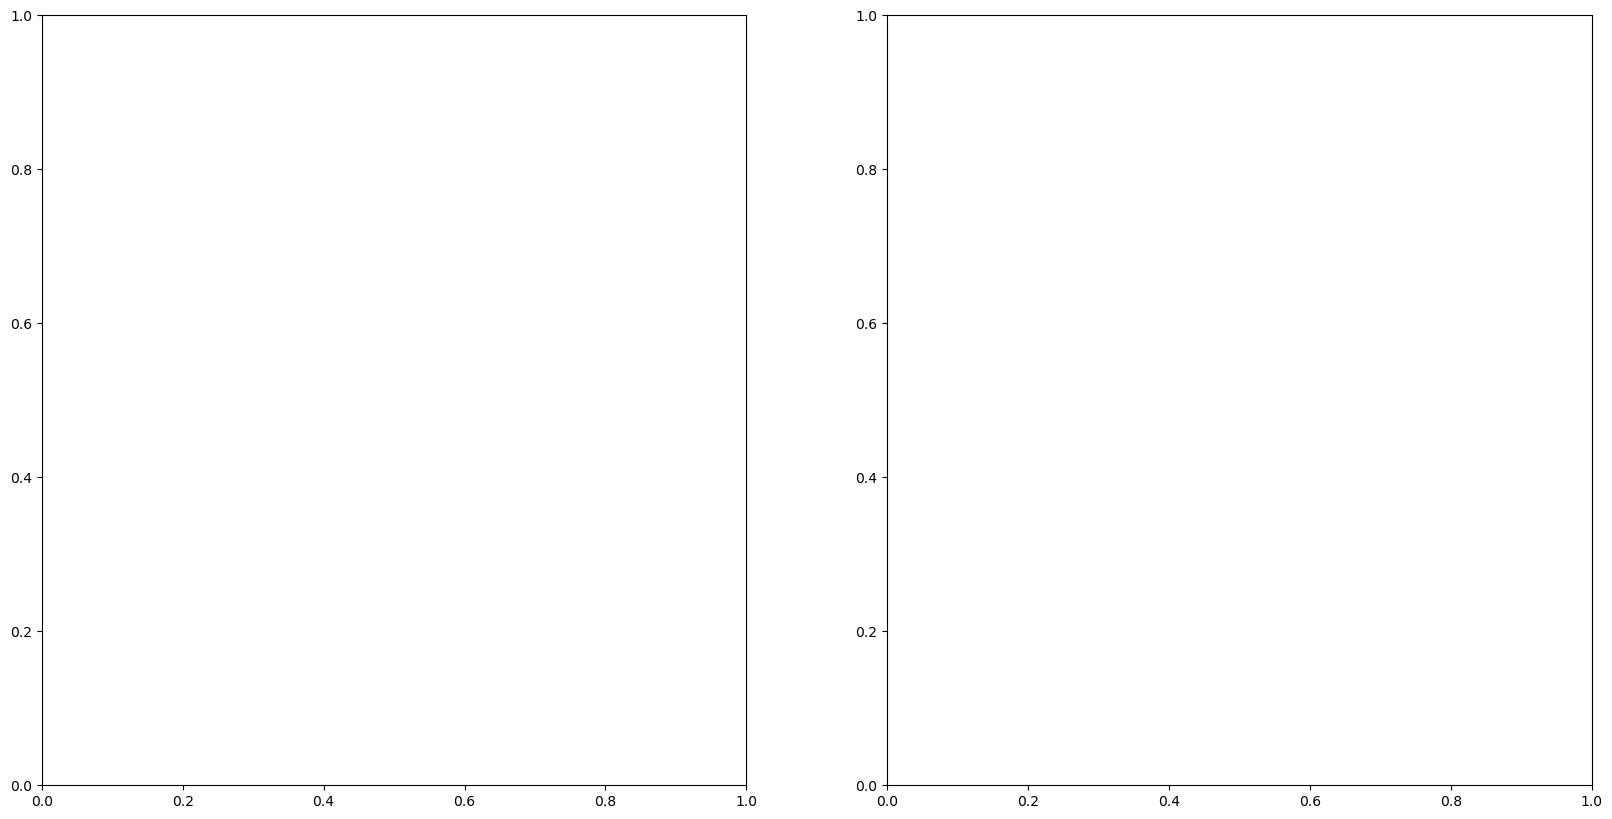

In [24]:
widgets.interactive(update_map,district=district, category=category,limit=limit_case)